In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D, Reshape, Flatten, MaxPooling2D, BatchNormalization, AveragePooling2D
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt

**Base de dados Cifar 10**

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_treino, y_treino), (X_teste, y_teste) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
X_treino.shape, y_treino.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
32 * 32 # Qtd de pixels

1024

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


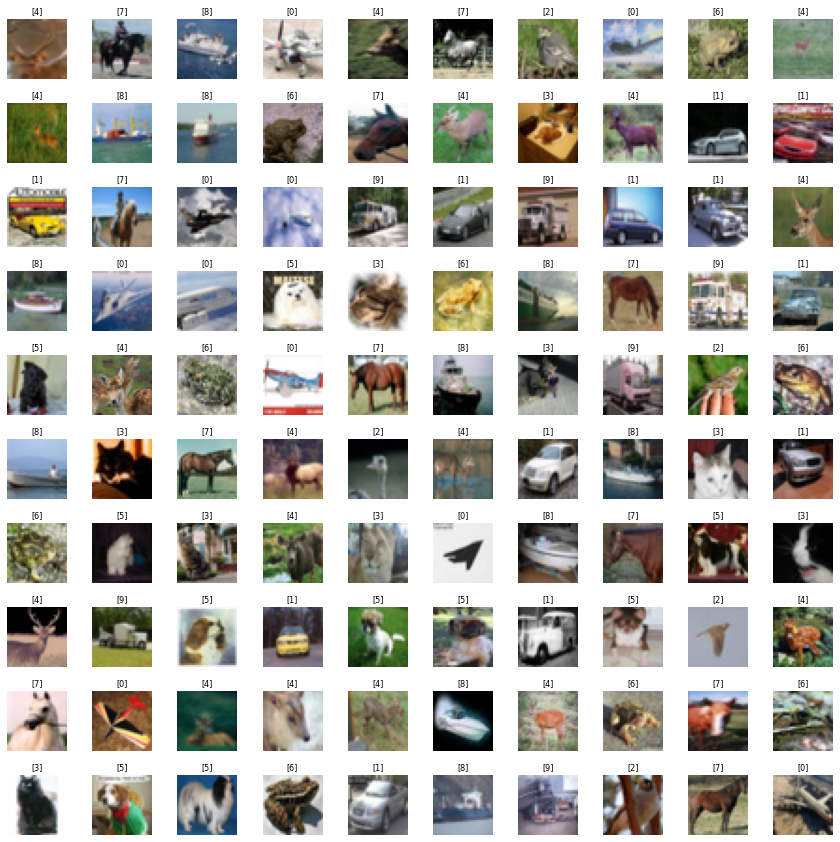

In [ ]:
largura = 10
altura = 10
figura, axes = plt.subplots(altura, largura, figsize=(15,15))

axes = axes.ravel()

for i in np.arange(0, 100):
  indice = np.random.randint(0, X_treino.shape[0])
  axes[i].imshow(X_treino[indice], cmap='gray')
  axes[i].set_title(y_treino[indice], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

As imagens possuem baixa qualidade, que pode impactar no desempenho do autoencoder

In [ ]:
# Pré-processamento
X_treino = X_treino / 255
X_teste = X_teste / 255 

In [ ]:
# Criação do autoencoder
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape=(32,32,3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding = 'same'))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding = 'same'))

autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding = 'same')) # Imagem codificada

# Decoder
autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(3, # Número de canais de cor
                       (3,3), activation = 'sigmoid', padding = 'same'))

In [23]:
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 average_pooling2d_10 (Avera  (None, 16, 16, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_14 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                      

In [ ]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(X_treino, X_treino, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 45s 21ms/step - loss: 0.5829 - accuracy: 0.6404
Epoch 2/50
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5682 - accuracy: 0.7219
Epoch 3/50
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5646 - accuracy: 0.7402
Epoch 4/50
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5631 - accuracy: 0.7496
Epoch 5/50
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5622 - accuracy: 0.7556
Epoch 6/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5613 - accuracy: 0.7598
Epoch 7/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5608 - accuracy: 0.7615
Epoch 8/50
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5606 - accuracy: 0.7624
Epoch 9/50
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5603 - accuracy: 0.7653
Epoch 10/50
1563/1563 [==============================] - 32s 21m

In [32]:
encoder  = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('average_pooling2d_12').output)
encoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 average_pooling2d_10 (Avera  (None, 16, 16, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        18464     
                                                           

In [33]:
imagens_teste_cod = encoder.predict(X_teste)

In [34]:
imagens_teste_cod.shape

(10000, 4, 4, 16)

In [35]:
imagens_teste_decod = autoencoder.predict(X_teste)
imagens_teste_decod.shape

(10000, 32, 32, 3)

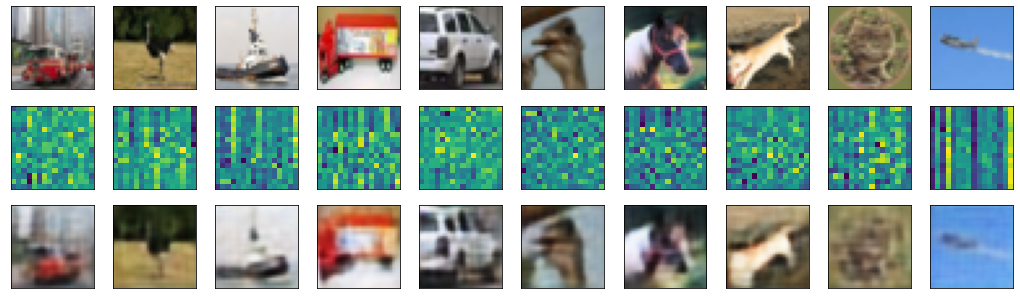

In [41]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
plt.figure(figsize = (18, 18))

for i, imagem_indice in enumerate(imagens_teste):
  ax = plt.subplot(10,10,i+1)
  plt.imshow(X_teste[imagem_indice].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

  ax = plt.subplot(10,10,i+1+numero_imagens)
  plt.imshow(imagens_teste_cod[imagem_indice].reshape(16,16))
  plt.xticks(())
  plt.yticks(())

  ax = plt.subplot(10,10,i+1+numero_imagens*2)
  plt.imshow(imagens_teste_decod[imagem_indice].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

Como as imagens estão borradas a saída do autoencoder também ficará borrada. Mas o resultado foi satisfatorio